In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, Adagrad

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Using TensorFlow backend.


In [2]:
a1 = 0.3
b1 = 0.3
a2 = 0.7
b2 = 0.7
a3 = 1
b3 = 1

In [3]:
step = 0.025
t = np.linspace(0, 2*np.pi, int(2*np.pi/step), endpoint=True)

In [4]:
def f(a, t):
    return a*np.cos(t)

def g(b, t):
    return b*np.sin(t)

In [5]:
x1 = f(a1, t)
y1 = g(b1, t)
x2= f(a2, t)
y2= g(b2, t)
x3= f(a3, t)
y3= g(b3, t)

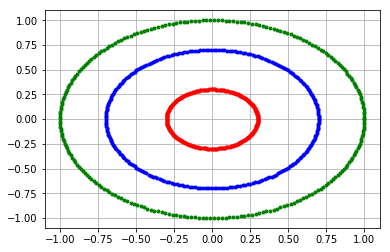

In [125]:
plt.plot(x1, y1, '.r')
plt.plot(x2, y2, '.b')
plt.plot(x3, y3, '.g')
plt.grid(True)
plt.show()

In [7]:
df1 = pd.DataFrame({'x' : x1, 'y' : y1, 'target' : 0})
df2 = pd.DataFrame({'x' : x2, 'y' : y2, 'target' : 1})
df3 = pd.DataFrame({'x' : x3, 'y' : y3, 'target' : 2})

In [8]:
def split_df(df):
    x_train, x_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=21)
    x_valid, x_test = train_test_split(x_test, test_size=0.3, shuffle=True, random_state=14)
    return x_train, x_valid, x_test

In [318]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))

model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [319]:
train = []
valid = []
test = []

for df in (df1, df2 ,df3):
    tr, v, te = split_df(df)
    train.append(tr)
    valid.append(v)
    test.append(te)
train = pd.concat(train)
valid = pd.concat(valid)
test = pd.concat(test)

In [320]:
y = pd.get_dummies(train['target'])
history = model.fit(train.iloc[:, :-1], y, epochs=30, shuffle=True)

Epoch 1/30
525/525 [==============================] - 1s 1ms/step - loss: 0.6604 - acc: 0.6292
Epoch 2/30
525/525 [==============================] - 0s 34us/step - loss: 0.6380 - acc: 0.6667
Epoch 3/30
525/525 [==============================] - 0s 31us/step - loss: 0.6331 - acc: 0.6667
Epoch 4/30
525/525 [==============================] - 0s 32us/step - loss: 0.6284 - acc: 0.6667
Epoch 5/30
525/525 [==============================] - 0s 32us/step - loss: 0.6177 - acc: 0.6667
Epoch 6/30
525/525 [==============================] - 0s 34us/step - loss: 0.5948 - acc: 0.6667
Epoch 7/30
525/525 [==============================] - 0s 31us/step - loss: 0.5541 - acc: 0.7067
Epoch 8/30
525/525 [==============================] - 0s 34us/step - loss: 0.5029 - acc: 0.7924
Epoch 9/30
525/525 [==============================] - 0s 31us/step - loss: 0.4355 - acc: 0.8286
Epoch 10/30
525/525 [==============================] - 0s 33us/step - loss: 0.3757 - acc: 0.8698
Epoch 11/30
525/525 [===================

In [321]:
p = []

In [322]:
p.append(model.predict_classes(train.iloc[:, :-1]))
accuracy_score(train['target'], p[-1])

1.0

In [323]:
p.append(model.predict_classes(test.iloc[:, :-1]))
accuracy_score(test['target'], p[-1])

1.0

In [324]:
p.append(model.predict_classes(valid.iloc[:, :-1]))
accuracy_score(valid['target'], p[-1])

1.0

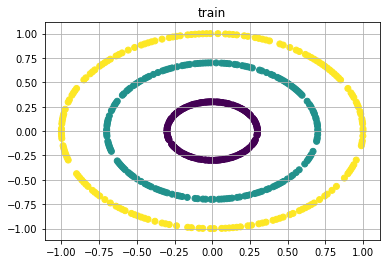

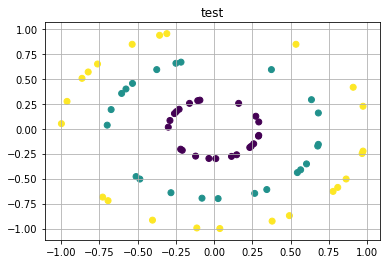

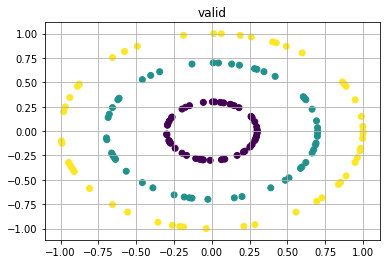

In [325]:
titles = ['train', 'test', 'valid']

for idx, df in enumerate((train, test, valid)):
    plt.scatter(df.x, df.y, c=p[idx])
    plt.grid(True)
    plt.title(titles[idx])
    plt.show()

In [326]:
h = 0.025
grid_pred = [model.predict(np.array([[i, j]])).round(1) for i in np.arange(-1.2, 1.2+h, h)
                                                       for j in np.arange(-1.2, 1.2+h, h)]

In [327]:
x_vals = np.arange(-1.2, 1.2+h, h)
y_vals = np.arange(-1.2, 1.2+h, h)

xx, yy = np.meshgrid(x_vals, y_vals)

In [328]:
rows = len(grid_pred)
colors = np.array(grid_pred).reshape((rows, 3))
colors.shape

(9409, 3)

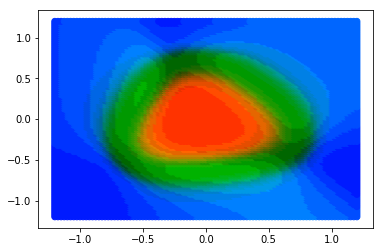

In [329]:
plt.scatter(xx, yy, c=colors);

## Задание 2

In [2]:
h = 0.02
t = np.linspace(0, 4, int(4/0.02), endpoint=True)
x = np.sin(t**2)

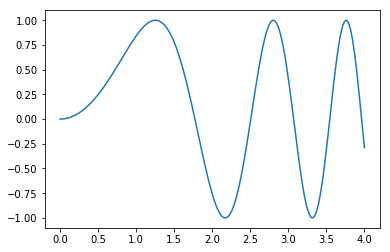

In [3]:
plt.plot(t, x);

In [4]:
train_size = int(t.shape[0] * 0.9)
train_size

180

In [98]:
X_train = t[:train_size]
y_train = x[:train_size]

X_test = t[train_size:]
y_test = x[train_size:]

In [23]:
tmp_train = np.column_stack((X_train, y_train))
tmp_test = np.column_stack((X_test, y_test))

In [24]:
scaler = StandardScaler()
tmp_train_scaled = scaler.fit_transform(tmp_train)
tmp_test_scaled = scaler.transform(tmp_test)

In [99]:
model = Sequential()
model.add(Dense(2, input_shape=(1,),  kernel_initializer='normal', activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [100]:
history = model.fit(X_train, y_train, epochs=30, verbose=1)

Epoch 1/30
180/180 [==============================] - 0s 3ms/step - loss: 0.5395
Epoch 2/30
180/180 [==============================] - 0s 28us/step - loss: 0.5345
Epoch 3/30
180/180 [==============================] - 0s 33us/step - loss: 0.5292
Epoch 4/30
180/180 [==============================] - 0s 31us/step - loss: 0.5239
Epoch 5/30
180/180 [==============================] - 0s 33us/step - loss: 0.5184
Epoch 6/30
180/180 [==============================] - 0s 31us/step - loss: 0.5123
Epoch 7/30
180/180 [==============================] - 0s 33us/step - loss: 0.5058
Epoch 8/30
180/180 [==============================] - 0s 36us/step - loss: 0.4991
Epoch 9/30
180/180 [==============================] - 0s 36us/step - loss: 0.4926
Epoch 10/30
180/180 [==============================] - 0s 33us/step - loss: 0.4859
Epoch 11/30
180/180 [==============================] - 0s 31us/step - loss: 0.4792
Epoch 12/30
180/180 [==============================] - 0s 31us/step - loss: 0.4715
Epoch 13/30
18

RMSE = 0.630031481052861


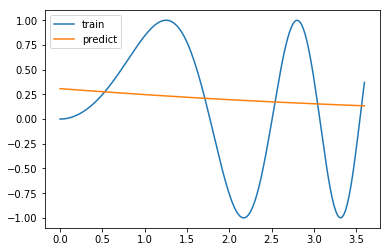

In [101]:
pred_x = model.predict(X_train)
mse = mean_squared_error(y_train, pred_x.flatten())
print(f'RMSE = {np.sqrt(mse)}')

plt.plot(X_train, y_train, label='train')
plt.plot(X_train, pred_x, label='predict')
plt.legend();

In [102]:
pred_x = model.predict(X_test)
mse = mean_squared_error(y_test, pred_x.flatten())
print(f'RMSE = {np.sqrt(mse)}')

RMSE = 0.6123850213645413


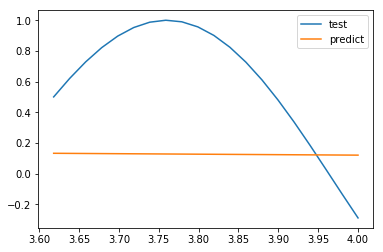

In [103]:
plt.plot(X_test, y_test, label='test')
plt.plot(X_test, pred_x, label='predict')
plt.legend();